In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import det
from scipy.optimize import fsolve
import math

# import system as sys
from system import avg_normal_params, full_lins, Graph, system
from methods import RK_system, shoot, error
# from bifan import bifan

In [2]:
temp_params = np.array([0.15, 0.15, 220., 
                        250., 0.01, 0.01]).reshape(3, 2)

y = np.array([20., 0, 0, 0])
shoot(y, params = temp_params)

[ 2.27887731e+07 -9.13905500e+06  5.37015591e+09  8.68105123e+08]
0 [ 2.27888862e+07 -9.13910032e+06  5.37020915e+09  8.68113707e+08]
1 [ 2.27887734e+07 -9.13905491e+06  5.37015601e+09  8.68105105e+08]
2 [ 2.27888626e+07 -9.13925538e+06  5.37015594e+09  8.68105151e+08]
3 [ 2.27887731e+07 -9.13905528e+06  5.37015591e+09  8.68105123e+08]
[[ 1.13011952e+06  2.05087259e+03  8.94479977e+05 -7.61337131e+02]
 [-4.53215466e+05  9.28646438e+02 -2.00376162e+06 -2.80062266e+03]
 [ 5.32367172e+08  9.65621529e+05  2.93412714e+05  1.27792358e+01]
 [ 8.58393233e+07 -1.75343693e+05  2.84354466e+05 -2.86316872e+01]]
[-9.39605731e+04  3.76821917e+04  2.80601158e+08  4.50763084e+07]
0 [-9.38464745e+04  3.76364344e+04  2.80627823e+08  4.50806192e+07]
1 [-9.39603680e+04  3.76822846e+04  2.80601206e+08  4.50762997e+07]
2 [-9.38710036e+04  3.74815434e+04  2.80617517e+08  4.50910067e+07]
3 [-9.39605731e+04  3.76821917e+04  2.80601158e+08  4.50763084e+07]
[[ 1.14098605e+06  2.05086926e+03  8.95694733e+05  0.00

(2, 1, array([ 9.9174519e+00, -2.2032361e-02, -8.7802238e+00,  4.6503823e+03],
       dtype=float32), 4650.4014, array([[ 1.14098605e+06,  2.05086926e+03,  8.95694733e+05,
          0.00000000e+00],
        [-4.57573307e+05,  9.28644864e+02, -2.00648284e+06,
          0.00000000e+00],
        [ 2.66655372e+08,  4.78814352e+05,  1.63586031e+08,
          0.00000000e+00],
        [ 4.31080013e+07, -8.69450864e+04,  1.46983016e+08,
          0.00000000e+00]]), 0.0, array([-9.39605731e+04,  3.76821917e+04,  2.80601158e+08,  4.50763084e+07]))

In [3]:
R_1_range = [0.15, 0.25, 0.5]
R_2_range = [0.15, 0.3, 0.5]
S_1_range = [220, 265, 320]
S_2_range = [250, 300, 380]
C_1 = [0.01, 0.3]
C_2 = [0.01, 0.4]

NORM_RANGES = np.array([[0.2, 0.3], [0.25, 0.4], [250, 280],
                        [285, 340], [0.1, 0.25], [0.2, 0.3]])

def is_normal(arr):
    res = np.ones(len(arr))
    for i, elem in enumerate(arr):
        lb, rb = NORM_RANGES[i][0], NORM_RANGES[i][1]
        res[i] = int((elem >= lb) and (elem <= rb))
    return res

np.set_printoptions(suppress=True)

In [ ]:
shoot()

In [9]:
data_frame = []
plots = []
cnt = 0
for r1 in R_1_range:
    for r2 in R_2_range:
        for s1 in S_1_range:
            for s2 in S_2_range:
                for c2 in [0.01, 0.25, 0.4]:
                    norms = []
                    Ds = []
                    for c1 in np.linspace(C_1[0], C_1[1], 30):
                        params = np.array([[r1, r2],
                                           [s1, s2], 
                                           [c1, c2]]) 
                        
                        # Newton results
                        its, conv, yt, norm, J, D, err = shoot([20., 0., 0., 0.], params = params)
                        
                        # Append data
                        is_norm_params = is_normal(params.flatten())
#                         print(its, yt, norm, D, params, is_norm_params)
                        data_frame.append([conv, its, yt, norm, J, D,
                                           params.flatten(), is_norm_params, np.round(err, 3)])
                        
                        norms.append(norm)
                        Ds.append(D)
                        
                    
                    plots.append((norms, Ds, is_norm_params))
                    cnt += 1
                    print(cnt)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


KeyboardInterrupt: 

In [10]:
df = pd.DataFrame(data_frame, columns = ['conv', 'its', 'yt', 'norm', 'J', 'D',
                                           'params', 'is_norm_params', 'err'])

df

# df['is_norm_params'] = df['is_norm_params'].apply(lambda x: [int(i) for i in x])
                                                             
# pattern = [0, 1, 0, 0, 0, 0]                                                             
# df_pattern = df[df['is_norm_params'].apply(lambda x: np.all(x == pattern))]
# df_pattern

conv  its                                              yt         norm  \
0       1    2  [9.514276, -0.096130654, -8.780236, 4650.3477]  4650.365723   
1       1    2    [9.514263, -0.10368429, -4.401124, 2332.226]  2332.249756   
2       1    2  [9.514251, -0.10608512, -2.9364948, 1556.3528]  1556.384644   
3       1    2  [9.514237, -0.10723577, -2.2032566, 1167.8224]  1167.863159   
4       1    2    [9.514224, -0.1078747, -1.7630181, 934.5142]   934.564331   
..    ...  ...                                             ...          ...   
524     1    2   [9.510347, 0.09604425, -23.298044, 304.17203]   305.211212   
525     1    2   [9.510088, 0.09581379, -21.842125, 285.16846]   286.161804   
526     1    2   [9.5098295, 0.09559482, -20.55744, 268.39978]   269.353851   
527     0   30                                             NaN          NaN   
528     0   30                                             NaN          NaN   

                                                     J    D  \
0    [[1086653.3828899264, 2050.602063536644, 85304...  0.0   
1    [[544789.2129421234, 2065.2346312999725, 89569...  0.0   
2    [[363517.8131517022, 2070.1185800135136, 89569...  0.0   
3    [[272760.23672893643, 2072.5617185235023, 8956...  0.0   
4    [[218266.6901964694, 2074.0280859172344, 89569...  0.0   
..                                                 ...  ...   
524  [[72807.5641556643, 2077.9397571459413, 21482....  0.0   
525  [[68258.61487304792, 2078.062028158456, 21482....  0.0   
526  [[64244.66739408671, 2078.1699451617897, 21482...  0.0   
527                                                NaN  NaN   
528                                                NaN  NaN   

                                                params  \
0               [0.15, 0.15, 220.0, 250.0, 0.01, 0.01]   
1    [0.15, 0.15, 220.0, 250.0, 0.01999999999999999...   
2               [0.15, 0.15, 220.0, 250.0, 0.03, 0.01]   
3    [0.15, 0.15, 220.0, 250.0, 0.03999999999999999...   
4    [0.15, 0.15, 220.0, 250.0, 0.04999999999999999...   
..                                                 ...   
524              [0.15, 0.15, 265.0, 380.0, 0.15, 0.4]   
525  [0.15, 0.15, 265.0, 380.0, 0.15999999999999998...   
526  [0.15, 0.15, 265.0, 380.0, 0.16999999999999998...   
527              [0.15, 0.15, 265.0, 380.0, 0.18, 0.4]   
528  [0.15, 0.15, 265.0, 380.0, 0.18999999999999997...   

                     is_norm_params  \
0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
..                              ...   
524  [0.0, 0.0, 1.0, 0.0, 1.0, 0.0]   
525  [0.0, 0.0, 1.0, 0.0, 1.0, 0.0]   
526  [0.0, 0.0, 1.0, 0.0, 1.0, 0.0]   
527  [0.0, 0.0, 1.0, 0.0, 1.0, 0.0]   
528  [0.0, 0.0, 1.0, 0.0, 1.0, 0.0]   

                                                   err  
0    [-553491.905, 221967.837, 175387324.223, 28067...  
1    [-277491.537, 111094.167, 44077212.452, 699367...  
2    [-185160.147, 74087.195, 19622295.6, 3093863.527]  
3    [-138932.314, 55574.581, 11045923.793, 1731602...  
4    [-111175.639, 44463.931, 7072237.942, 1102517....  
..                                                 ...  
524   [-37098.728, 14830.671, 1730991.256, 270547.448]  
525   [-34781.752, 13904.261, 1521023.916, 237363.001]  
526   [-32737.232, 13086.849, 1347021.464, 209884.068]  
527                [-0.293, -1.642, 2052.781, 310.384]  
528                    [-0.488, -3.084, 10.937, 1.736]  

[529 rows x 9 columns]

In [6]:
plots[0]

([4650.3657,
  2332.2498,
  1556.3846,
  1167.8632,
  934.56433,
  778.9558,
  667.7708,
  584.36334,
  519.4804,
  467.5681,
  425.09094,
  389.69128,
  359.7367,
  334.06082,
  311.80832,
  292.3375,
  275.1577,
  259.8872,
  1012.4007,
  895.2904,
  798.22705,
  1169.1162,
  1051.9232,
  951.8556,
  865.69507,
  790.97205,
  725.7067,
  668.3767,
  617.72107,
  572.7299],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 array([0., 0., 0., 0., 0., 0.]))

In [23]:
params = np.array([[0.2, 0.3],
                   [260, 300],
                   [0.3, 0.25]]) 

I = 0.00003
R1, R2, S1, S2, C1, C2 = params.flatten()
A1 = R1/I
B1 = 1/I/C1
A2 = R2/I
B2 = 1/I/C2
a1, b1, a2, b2 = 0, 0.8, 0.8, 0.21
delta_heart = 15**(-16)

alp11 = (np.sqrt(A1**2 - 4*B1) + A1) * (b1 - a1) / 2
alp12 = (np.sqrt(A1**2 - 4*B1) - A1) * (b1 - a1) / 2
alp21 = (np.sqrt(A2**2 - 4*B2) + A2) * (b2 - a2) / 2
alp22 = (np.sqrt(A2**2 - 4*B2) - A2) * (b2 - a2) / 2

v1 = lambda k1, k2, t: k1*np.exp(-t*alp11) + k2*np.exp(t*alp12)
v2 = lambda k1, k2, t: k1*np.exp(-t*alp21) + k2*np.exp(t*alp22)
dv1 = lambda k1, k2, t: -alp11*k1*np.exp(-t*alp11) + alp12*k2*np.exp(t*alp12)
dv2 = lambda k1, k2, t: -alp21*k1*np.exp(-t*alp21) + alp22*k2*np.exp(t*alp22)

def equations_a(p):
    K11, K12, K21, K22 = p
    
    v1_a1 = v1(K11, K12, a1)
    v1_b1 = v1(K11, K12, b1)
    
    v2_a2 = v2(K21, K22, a2)
    v2_b2 = v2(K21, K22, b2)
    
    dv1_a1 = dv1(K11, K12, a1)
    dv1_b1 = dv1(K11, K12, b1)
    
    dv2_a2 = dv2(K21, K22, a2)
    dv2_b2 = dv2(K21, K22, b2)
    
    eq1 = v1_a1 - v2_b2
    eq2 = v1_b1 - v2_a2
    eq3 = dv1_a1**2/S1**2/2/(b1 - a1) + v1_a1/C1/1.05 + delta_heart - dv2_b2**2/S2**2/2/(b2 - a2) - v2_b2/C2/1.05 
    eq4 = dv1_b1**2/S1**2/2/(b1 - a1) + v1_b1/C1/1.05 - dv2_a2**2/S2**2/2/(b2 - a2) - v2_a2/C2/1.05 
    
    return (eq1, eq2, eq3, eq4)

K11,K12, K21, K22 = fsolve(equations_a, (10, 10, 10, 10))
K11, K12, K21, K22

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


(10.0, 10.0, 10.0, 10.0)

In [25]:
(v1(K11, K12, 21/2), v1(K11, K12, 21/2), v2(K21, K22, 21/2), v2(K21, K22, 21/2))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


(1.1117436714768224e-60, 1.1117436714768224e-60, inf, inf)

In [22]:
shoot(0, 21, y_init = np.zeros(4), params = params)

5.0
7.185315744587267e-06


(2, 0, array([ 3.3317512e-01,  3.9305365e+00,  2.9757281e-03, -5.6497318e-01],
       dtype=float32), 3.9848874, array([[-2.48180113e+00, -2.31648573e-01,  3.48531612e+01,
         -2.89157797e+00],
        [-6.76302137e-01,  2.95452444e-02, -1.17815425e+01,
         -2.55334336e-01],
        [-3.42501793e+01,  2.94031634e+00,  3.09014758e+00,
          2.74187164e-01],
        [ 1.01498141e+01,  4.07740333e-01,  9.76607096e-01,
         -2.26384587e-02]]), 1895.636576412641, array([-1.19209290e-07,  5.61820331e-06, -4.35113907e-06, -1.05732298e-06]))

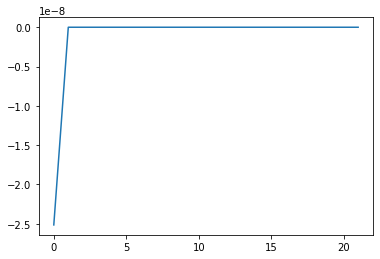

In [18]:
t = range(22)
V1 = [v1(K11, K12, x) for x in t]

plt.plot(t, V1)

## Bif

In [2]:
BIF_MAPS = np.array([])
pairs = [list(i) for i in (itertools.combinations(range(len(Graph) * 3), 2))]

dm_map = ['R', 'S', 'C']
    
for cnt, p in enumerate(pairs):
    dm1, ves1, dm2, ves2 = p[0] // len(Graph), p[0] % len(Graph), p[1] // len(Graph), p[1] % len(Graph)
    
    range_1 = full_lins[dm1, ves1]
    range_2 = full_lins[dm2, ves2]
    params = avg_normal_params.copy()
    
    bif_params = []
    
    for p1 in range_1:
        for p2 in range_2:
            params[dm1, ves1] = p1
            params[dm2, ves2] = p2
            bif_params.append(params.copy())            
#     print(cnt)
    print([dm_map[dm1], ves1 + 1, dm_map[dm2], ves2 + 1])
    bif_map = bifan(bif_params)
    break
    BIF_MAPS = np.append(BIF_MAPS, bif_map)

['R', 1, 'R', 2]
Converged in 7 iterations Converged in 8 iterations Converged in 7 iterations Converged in 6 iterations Converged in 7 iterations Converged in 6 iterations Converged in 7 iterations Converged in 7 iterations Converged in 7 iterations Converged in 9 iterations Converged in 8 iterations Converged in 6 iterations Converged in 7 iterations Converged in 7 iterations Converged in 8 iterations Converged in 7 iterations 

KeyboardInterrupt: 

In [50]:
BIF_MAPS = bif.reshape((15, 10, 10))
with open('bifmaps_norm.npy', 'wb') as f:
    np.save(f, BIF_MAPS)

## Plot

[nan -1. -1.  0.  1.  0.  1.  1.  1.  1.]


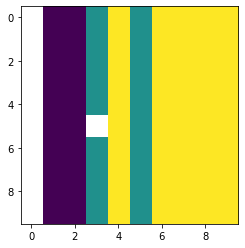

In [55]:
import matplotlib.pyplot as plt

with open('bifmaps_norm.npy', 'rb') as file:
    BIF_MAPS = np.load(file)

BIF_MAPS_sgn = np.sign(BIF_MAPS)

print(BIF_MAPS_sgn[3][0])
plt.imshow(BIF_MAPS_sgn[3]);

In [78]:
dm_map = ['R', 'S', 'C']
xlabels = []
ylabels = []
for cnt, p in enumerate(pairs):
    dm1, ves1, dm2, ves2 = p[0] // len(Graph), p[0] % len(Graph), p[1] // len(Graph), p[1] % len(Graph)
    ylabels.append(' '.join(str(i) for i in [dm_map[dm1], ves1 + 1]))
    xlabels.append(' '.join(str(i) for i in [dm_map[dm2], ves2 + 1]))
    
    if cnt == 3:
        print(full_lins[dm2, ves2])

[0.         0.04444444 0.08888889 0.13333333 0.17777778 0.22222222
 0.26666667 0.31111111 0.35555556 0.4       ]


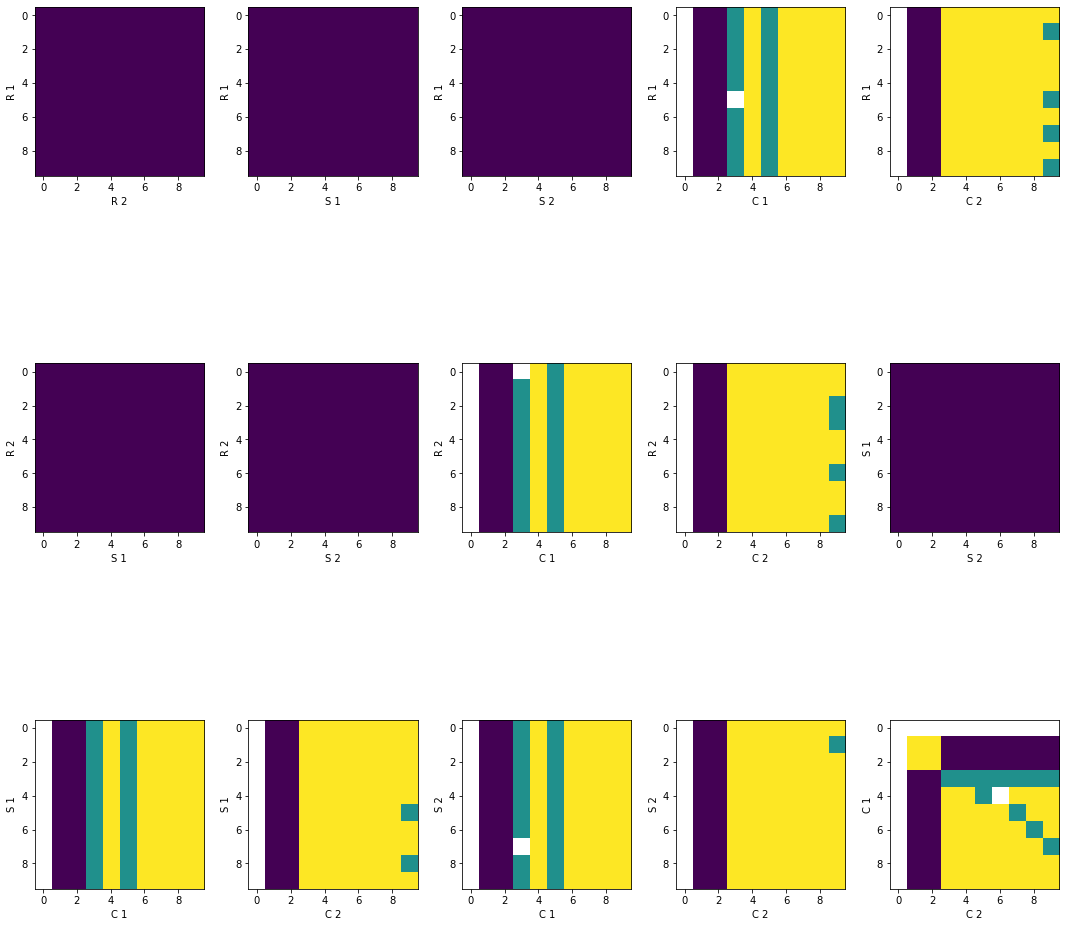

In [77]:
fig, axs = plt.subplots(3, 5, figsize=(15,15))
plt.tight_layout()

cnt = 0
for i in range(3):
    for j in range(5):
        axs[i, j].imshow(BIF_MAPS_sgn[cnt])
        axs[i, j].set_xlabel(xlabels[cnt])
        axs[i, j].set_ylabel(ylabels[cnt])
        cnt += 1

plt.show()

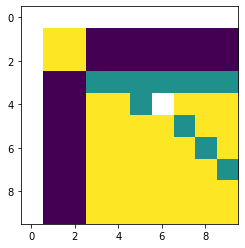

In [69]:
plt.imshow(BIF_MAPS_sgn[-1])

## Plot 2

In [131]:
d = {}
for i in range(len(plots)):
    d[i] = {'norm':plots[i][0], 
            'D':plots[i][1], 
            'name':plots[i][2]
           }

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


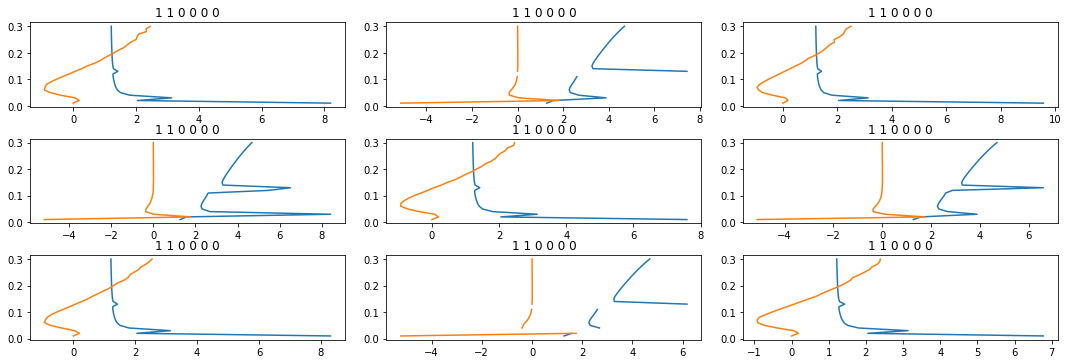

In [216]:
cnt = 9
needed = []
for i, elem in enumerate(plots):
    n, d, name = elem
#     print(name)
    if np.all(name == np.array([1., 1., 0., 0., 0., 0.])):
        needed.append(i)
        cnt -= 1
    if not cnt:
        break
    
needed_plots = np.array(plots)[needed]

fig, axs = plt.subplots(3, 3, figsize=(15, 5))
plt.tight_layout()

c = np.linspace(C_1[0], C_1[1], 30)

for i, elem in enumerate(needed_plots):
    axs[i // 3, i % 3].plot(np.log(elem[0]), c)
    axs[i // 3, i % 3].plot(elem[1], c)
    axs[i // 3, i % 3].title.set_text(' '.join([str(int(i)) for i in elem[2]]));

In [356]:
x = [1, 2, 3, 4, 5, 6]
x[:4] + x[-1:]

[1, 2, 3, 4, 6]

In [436]:
def get_pattern(data, pat=[0]*6):
    pat = ' '.join([str(i) for i in (pat[:4] + pat[-1:])])
    return data[data['is_norm_params'].apply(lambda x: ' '.join([str(i) for i in (x[:4] + x[-1:])])) == pat].copy()


temp = get_pattern(df, [1]*4+[0]+[1])
temp.head()

conv its                                                 yt       norm  \
14070    1   5  [-0.0334000103, -3.5610330105, -0.0448000208, ...   3.649028   
14071    1   5  [0.077815935, -4.7546486855, -0.0934977904, -1...   5.036962   
14072    0  30                                               None       None   
14073    1   6  [0.1249595582, 15.3028106689, -0.2049123496000...  15.729779   
14074    1   5  [0.1925255954, 10.0930080414, -0.2688330412, -...  11.166955   

                                                       J         D  \
14070  [[0.7157862819, -0.0068631789, -0.627807694400... -4.006713   
14071  [[-0.6577446720000001, -0.0107325104, -0.62794...   1.30021   
14072                                               None      None   
14073  [[-0.8757392061, 0.0084875501, -0.6284892879, ... -0.251695   
14074  [[-0.7387551159, 0.0141148121, -0.627677727600...  -0.23585   

                                      params      is_norm_params plot  
14070  [0.2, 0.25, 250.0, 285.0, 0.01, 0.25]  [1, 1, 1, 1, 0, 1]  469  
14071  [0.2, 0.25, 250.0, 285.0, 0.02, 0.25]  [1, 1, 1, 1, 0, 1]  469  
14072  [0.2, 0.25, 250.0, 285.0, 0.03, 0.25]  [1, 1, 1, 1, 0, 1]  469  
14073  [0.2, 0.25, 250.0, 285.0, 0.04, 0.25]  [1, 1, 1, 1, 0, 1]  469  
14074  [0.2, 0.25, 250.0, 285.0, 0.05, 0.25]  [1, 1, 1, 1, 0, 1]  469

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


D       norm                                                 yt
0  -3.902538   1.294461                [-0.0334, -3.561, -0.0448, -0.7946]
1   1.267102   1.616799                [0.0778, -4.7546, -0.0935, -1.6582]
2   0.046471   3.934334               [0.0851, -51.0615, -0.1478, -2.6026]
3  -0.243473   2.755539                 [0.125, 15.3026, -0.2049, -3.6321]
4  -0.229700   2.412931                [0.1925, 10.0927, -0.2688, -4.7667]
5  -0.170073   2.388690                  [0.2986, 9.074, -0.3396, -6.0209]
6  -0.107259   2.456632                 [0.4656, 8.9841, -0.4183, -7.4146]
7  -0.058795   2.557805                 [0.7379, 9.2352, -0.5066, -8.9729]
8  -0.033881   2.670294                  [1.211, 9.5766, -0.6068, -10.728]
9  -0.018057   2.782954                 [2.1363, 9.713, -0.7243, -12.7252]
10 -0.009923   2.889114                [4.4839, 8.6937, -0.8822, -15.0573]
11       NaN   9.815338      [-14851.3262, 9798.8574, 1404.509, 4098.1353]
12       NaN   5.304980            [141.2872, -142.8223, 4.7489, -12.4008]
13  0.000159   3.772832             [-13.6261, 32.7805, -1.8078, -25.0802]
14  0.002814   3.741527               [-7.9914, 29.6122, -1.773, -28.8751]
15  0.002221   3.851524              [-6.7484, 31.6751, -2.0323, -34.0897]
16  0.001962   3.997883              [-6.4456, 35.5669, -2.4015, -40.6945]
17  0.002287   4.167954              [-6.6228, 41.1764, -2.8958, -49.2265]
18  0.001445   4.361809              [-7.1993, 49.0345, -3.5709, -60.6417]
19  0.000889   4.585401              [-8.2609, 60.3456, -4.5394, -76.6935]
20  0.000706   4.851529             [-10.1086, 77.6885, -6.046, -100.9621]
21  0.000257   5.187075            [-13.6438, 107.4705, -8.754, -142.1562]
22  0.000106   5.669179          [-23.6503, 173.1269, -15.9779, -230.6394]
23       NaN   8.214671       [-150.1718, 1542.3154, -97.3897, -3352.6831]
24       NaN  10.827145  [-2014.0166, 29444.6504, -1623.2129, -40785.1484]
25       NaN   8.819775         [662.3329, -1217.6653, 458.8847, 6607.332]
26       NaN        NaN                                                NaN
27  0.000315   5.408633            [11.6616, -126.7342, 10.0688, 183.2364]
28  0.000637   5.142296                [8.723, -96.5184, 7.7706, 140.8039]
29  0.000391   4.945187               [7.0023, -78.8081, 6.4184, 115.9245]

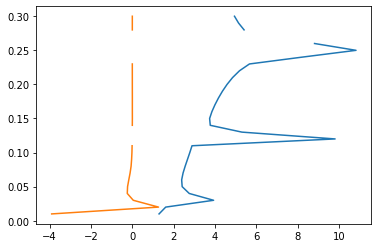

In [437]:
pattern_plots = temp.groupby('plot')['norm', 'D', 'yt'].agg(lambda x: [i if i else np.nan for i in list(x)])
norm, D, yt = pattern_plots.iloc[2, :]
c = np.linspace(C_1[0], C_1[1], 30)

plt.plot(np.log(norm), c);
plt.plot(D, c);
pattern_plots_df = pd.DataFrame({'D':D, 'norm':np.log(norm), 'yt': yt})
pattern_plots_df.yt = pattern_plots_df.yt.apply(lambda x: np.round(x, 4))
pattern_plots_df

In [438]:
abs(np.nan) < 10**(-10)

False

## Archive

In [6]:
# with open('analysis_27.01.npy', 'wb') as file:
#     np.save(file, np.array(data))

In [4]:
with open('analysis_27.01.npy', 'rb') as file:
    data = np.load(file)

In [10]:
cases = data[:6000, ].reshape((-1, 30, 8))
cases.shape

In [52]:
R_1_range[1:4]

[0.2, 0.25, 0.3]

In [114]:

               
# params = np.round(cases[:, 0, [0, 1, 2, 3, 5]], 2)
# isnp = [is_normal(i) for i in params]

# is_normal([  0.15,   0.3 , 280.  , 250.  ,   0.  ,   0.25])

In [85]:
idx = []
for i, e in enumerate(isnp):
    if np.array_equal(e, [0, 1, 1, 1, 1]):
        idx.append(i)
        
idx[:6]

[94, 97, 100, 103, 109, 112]

In [71]:
cases[np.where(cases == [0, 1, 1, 1, 1])[:6]]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([], shape=(0, 30, 8), dtype=float64)

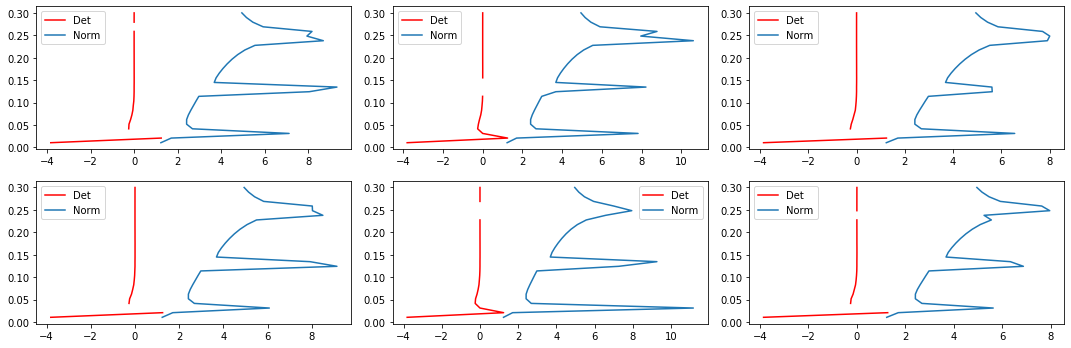

In [87]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))
plt.tight_layout()

for i, case in enumerate(cases[idx[:6]]):
    c = case.T[4]
    norm = case.T[-2]
    D = case.T[-1]
    axs[i//3, i%3].plot(D, c, color='red')
    axs[i//3, i%3].plot(np.log(norm), c)
    axs[i//3, i%3].legend(['Det', 'Norm'])

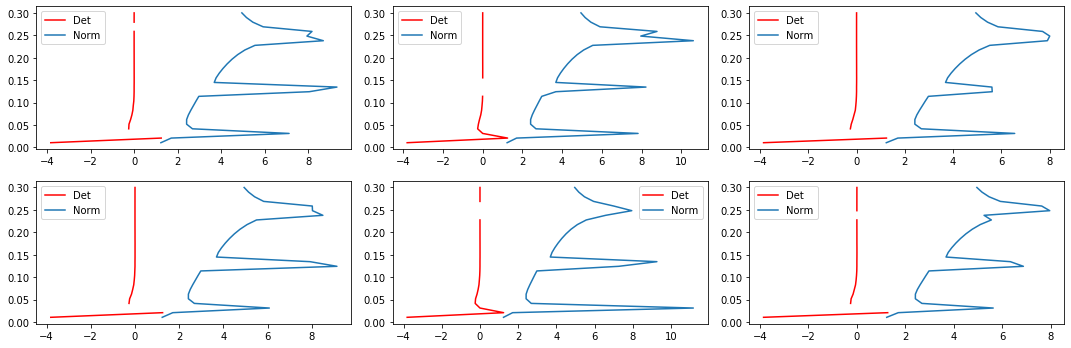

In [106]:
idx = []
for i, e in enumerate(isnp):
    if np.array_equal(e, [0, 1, 1, 1, 1]):
        idx.append(i)
        

fig, axs = plt.subplots(2, 3, figsize=(15, 5))
plt.tight_layout()

for i, case in enumerate(cases[idx[:6]]):
    c = case.T[4]
    norm = case.T[-2]
    D = case.T[-1]
    axs[i//3, i%3].plot(D, c, color='red')
    axs[i//3, i%3].plot(np.log(norm), c)
    axs[i//3, i%3].legend(['Det', 'Norm'])

In [110]:
cases[idx[:6]][0][:, [4, -1, -2]]

array([[    0.        ,            nan,            nan],
       [    0.01034483,    -3.83372   ,     3.42754388],
       [    0.02068966,     1.24686   ,     5.51807261],
       [    0.03103448,            nan,  1245.18029785],
       [    0.04137931,    -0.24838   ,    14.62508678],
       [    0.05172414,    -0.23533   ,    11.17822647],
       [    0.06206897,    -0.16147   ,    11.19150066],
       [    0.07241379,    -0.10213   ,    12.14391899],
       [    0.08275862,    -0.05826   ,    13.56684875],
       [    0.09310345,    -0.03885   ,    15.30749989],
       [    0.10344828,    -0.01432   ,    17.27686691],
       [    0.1137931 ,    -0.00498   ,    19.60037422],
       [    0.12413793,     0.        ,  3156.89526367],
       [    0.13448276,     0.        , 11242.4296875 ],
       [    0.14482759,     0.00232   ,    39.82915878],
       [    0.15517241,     0.00246   ,    43.46509171],
       [    0.16551724,     0.00204   ,    50.17093658],
       [    0.17586207,     0.0

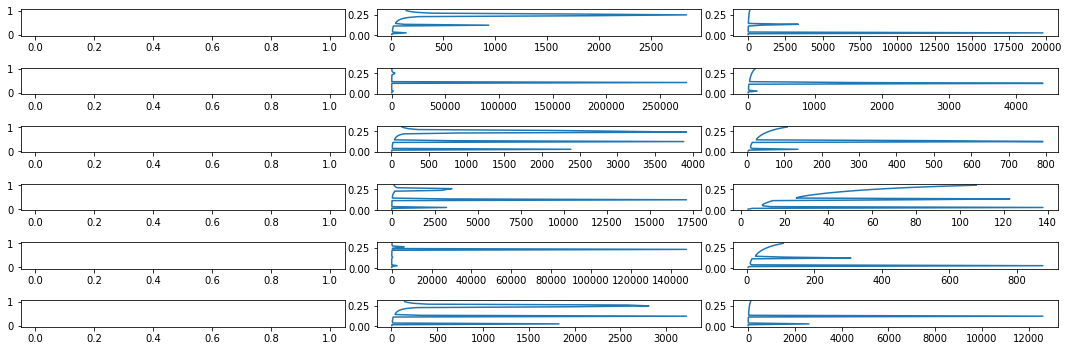

In [78]:
fig, axs = plt.subplots(6, 3, figsize=(15, 5))
plt.tight_layout()

for i, case in enumerate(cases[:18]):
    c = case.T[0]
    norm = case.T[1]
    axs[i//3, i%3].plot(norm, c)

In [76]:
data[:, 0]

array([0.15, 0.15, 0.15, ..., 0.15, 0.15, 0.15])